In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('loan_data.csv')
print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
# Step 2: Data Preprocessing
from sklearn.preprocessing import LabelEncoder

# Create a copy to keep the original data safe
df_clean = df.copy()

# Drop the 'Id' column if it exists
if 'Id' in df_clean.columns:
    df_clean = df_clean.drop('Id', axis=1)
elif 'ID' in df_clean.columns:
    df_clean = df_clean.drop('ID', axis=1)

categorical_cols = df_clean.select_dtypes(include=['object']).columns

    # Convert text columns to numbers
le = LabelEncoder()
for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

# Display the first few rows to see the changes (everything should be numbers now)
print("Data successfully converted to numbers!")
df_clean.head()

Data successfully converted to numbers!


,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1


In [4]:
# Step 3: Split Data into Features (X) and Target (y)

# Define X (all columns except the target 'Risk_Flag')
X = df_clean.drop('Risk_Flag', axis=1)

# Define y (only the target column 'Risk_Flag')
y = df_clean['Risk_Flag']

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data successfully split!")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Data successfully split!
Training data shape: (201600, 11)
Testing data shape: (50400, 11)


In [11]:
# Step 4.1: Train Logistic Regression
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# specific warnings ignore to keep output clean
warnings.filterwarnings('ignore')

# Initialize the model
log_model = LogisticRegression(max_iter=1000)

# Train the model
print("Training Logistic Regression...")
log_model.fit(X_train, y_train)

# Make predictions
log_pred = log_model.predict(X_test)

# Calculate metrics with zero_division handled
log_acc = accuracy_score(y_test, log_pred)
log_prec = precision_score(y_test, log_pred, average='weighted', zero_division=0)
log_rec = recall_score(y_test, log_pred, average='weighted', zero_division=0)
log_f1 = f1_score(y_test, log_pred, average='weighted', zero_division=0)

print(f"Logistic Regression Results:")
print(f"Accuracy:  {log_acc * 100:.2f}%")
print(f"Precision: {log_prec * 100:.2f}%")
print(f"Recall:    {log_rec * 100:.2f}%")
print(f"F1 Score:  {log_f1 * 100:.2f}%")

Training Logistic Regression...
Logistic Regression Results:
Accuracy:  87.59%
Precision: 76.73%
Recall:    87.59%
F1 Score:  81.80%


In [12]:
# Step 4.2: Train Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
print("Training Decision Tree...")
tree_model.fit(X_train, y_train)

# Make predictions
tree_pred = tree_model.predict(X_test)

# Calculate metrics
tree_acc = accuracy_score(y_test, tree_pred)
tree_prec = precision_score(y_test, tree_pred, average='weighted', zero_division=0)
tree_rec = recall_score(y_test, tree_pred, average='weighted', zero_division=0)
tree_f1 = f1_score(y_test, tree_pred, average='weighted', zero_division=0)

print(f"Decision Tree Results:")
print(f"Accuracy:  {tree_acc * 100:.2f}%")
print(f"Precision: {tree_prec * 100:.2f}%")
print(f"Recall:    {tree_rec * 100:.2f}%")
print(f"F1 Score:  {tree_f1 * 100:.2f}%")

Training Decision Tree...
Decision Tree Results:
Accuracy:  88.00%
Precision: 88.57%
Recall:    88.00%
F1 Score:  88.26%


In [13]:
# Step 4.3: Train Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
print("Training Random Forest... (this might take a moment)")
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Calculate metrics
rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred, average='weighted', zero_division=0)
rf_rec = recall_score(y_test, rf_pred, average='weighted', zero_division=0)
rf_f1 = f1_score(y_test, rf_pred, average='weighted', zero_division=0)

print(f"Random Forest Results:")
print(f"Accuracy:  {rf_acc * 100:.2f}%")
print(f"Precision: {rf_prec * 100:.2f}%")
print(f"Recall:    {rf_rec * 100:.2f}%")
print(f"F1 Score:  {rf_f1 * 100:.2f}%")

Training Random Forest... (this might take a moment)
Random Forest Results:
Accuracy:  89.85%
Precision: 89.39%
Recall:    89.85%
F1 Score:  89.59%


                 Model   Accuracy   F1 Score
2        Random Forest  89.849206  89.589793
1        Decision Tree  88.003968  88.263105
0  Logistic Regression  87.593254  81.800150


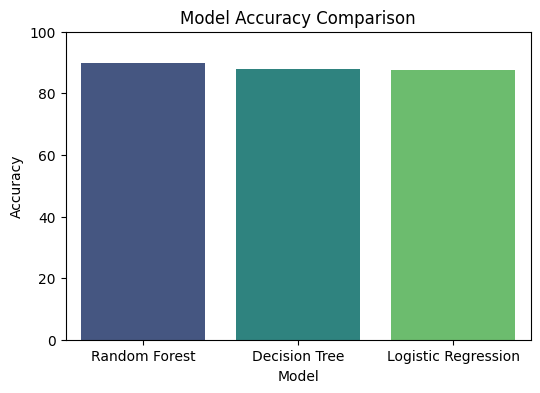

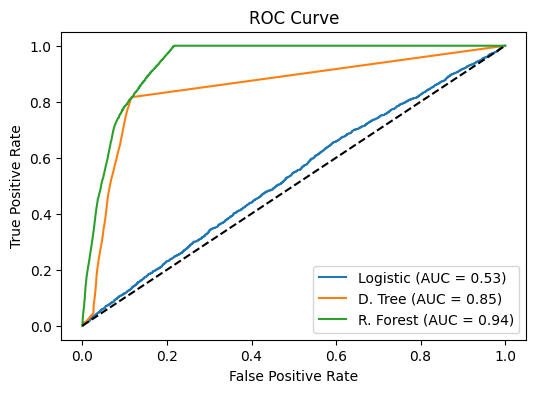

In [17]:
# Step 5: Compare Results & Plot Graphs
from sklearn.metrics import roc_curve, auc

# 1. Print Comparison Table
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [log_acc*100, tree_acc*100, rf_acc*100],
    'F1 Score': [log_f1*100, tree_f1*100, rf_f1*100]
}).sort_values(by='Accuracy', ascending=False)
print(results)

# 2. Plot Accuracy Bar Chart
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)
plt.show()

# 3. Plot ROC Curve
plt.figure(figsize=(6, 4))

# Calculate and plot ROC for each model
for model, name in [(log_model, 'Logistic'), (tree_model, 'D. Tree'), (rf_model, 'R. Forest')]:
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--') # Diagonal dashed line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()